# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/Users/dasakalinina/Desktop/Practicum/_all_projects/Real_estate/real_estate_data.csv', sep='\t')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Таблица состоит из 22 столбцов и 23699 строк с разными типами значений. 

**Количественные переменные (целочисленные):**
* total_images,
* rooms,
* floor.

**Количественные переменные (вещественные):**
* last_price,
* total_area,
* ceiling_height,
* floors_total,
* living_area,
* kitchen_area,
* balcony,
* airports_nearest,
* cityCenters_nearest,
* parks_around3000,
* parks_nearest,
* ponds_around3000,
* ponds_nearest,
* days_exposition.

**Категориальные переменные:**
* first_day_exposition,
* is_apartment,
* locality_name.

**Булевые переменные:**
* studio,
* open_plan.

In [3]:
#проверяю пропуски
print('Общее число дубликатов:', data.duplicated().sum())

#проверяю пропуски
print('Общее число пропущенных значений:', data.isna().sum())

Общее число дубликатов: 0
Общее число пропущенных значений: total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Явных дубликатов в таблице нет.

Всего строк в таблице - 26399 шт.

Пропуски данных есть в столбцах:
* ceiling_height
* floors_total - общий объем пропущенных данных составляет около 0,3% от заполенных, можно удалить строки.
* living_area
* is_apartment
* kitchen_area - оставить пропуски (возможно, кухня общаяя, как, например, в общежитиях или коммунальных квартирах).
* balcony - пропуски заменить на 0.
* locality_name - общий объем пропущенных данных составляет около 0,1% от заполенных, можно удалить строки.
* airports_nearest
* cityCenters_nearest
* parks_around3000
* parks_nearest
* ponds_around3000
* ponds_nearest
* days_exposition


In [4]:
#посмотреть уникальные значения по ряду столбцов
print('Значения в rooms:', data['rooms'].sort_values().unique())
print('Значения в ceiling_height:', data['ceiling_height'].sort_values().unique())
print('Значения в first_day_exposition:', data['first_day_exposition'].sort_values().unique())
print('Значения в floors_total:', data['floors_total'].sort_values().unique())
print('Значения в living_area:', data['living_area'].sort_values().unique())
print('Значения в is_apartment:', data['is_apartment'].sort_values().unique())
print('Значения в floor:', data['floor'].sort_values().unique())
print('Значения в kitchen_area:', data['kitchen_area'].sort_values().unique())
print('Значения в balcony:', data['balcony'].sort_values().unique())
print('Значения в locality_name:', data['locality_name'].sort_values().unique())
print('Количество уникальных значений в locality_name:', data['locality_name'].value_counts().count())
print('Значения в parks_around3000:', data['parks_around3000'].sort_values().unique())
print('Значения в ponds_around3000:', data['ponds_around3000'].sort_values().unique())
print('Значения в days_exposition:', data['days_exposition'].sort_values().unique())
print('Значения в total_area:', data['total_area'].sort_values().unique())
print('Количество уникальных значений в total_area:', data['total_area'].value_counts().count())

Значения в rooms: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 19]
Значения в ceiling_height: [  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66 

**Количество комнат**<br>
Значения варьируются от 0 до 19.<br>
Есть сомнения по значениям 0, обычно квартиры содержат хотя бы 1 комнату.<br> 
Значения больше 10 тоже кажутся неправдоподобными, видимо, представлен и рынок загородной недвижимости или продажа зданий в городе целиком. Возможно, также содержатся данные по коммерческой недвижимости.

**Высота потолков**<br>
Диапазон значений от 1 до 100, есть пропуски данных.<br>
Значения, которые кажутся ошибочными: до 2 метров и больше 5 метров. И если диапазон от 5 до 14 метров еще приемлем для лофтов или коммерческой недвижимости, то свыше данные свыше 20 метров, возможно, являются ошибками ввода данных: не хватает запятой или единцы измерения другие.

**Первый день экспозиции**<br>
Большое количество данных за несколько лет: в диапазоне от ноября 2014 до мая 2019.

**Общее количество этажей**<br>
Диапазон значений от 1 до 60.<br>
Поисковик Yandex выдал статьи, что высота жилых зданий в Санкт-Петербурге максимально 35 этажей. Тогда есть вопросы по этажности от 26 до 60. Опять же гипотеза по включению данных о коммерческой недвижимости, но даже в этом случае этажность в 100 превышает высоту Лахта-центра (87 этажей согласно Wikipedia).
Есть пропуски данных.

**Общая площадь**<br>
Диапазон значений от 2 до 409.7, есть пропуски данных.<br>
Очень маленькие значения (до 5 м2 или даже до 10м2) кажутся неправдоподобными: даже если продается комната в общежитии, то у нее должна быть площадь больше 2 м2.
<br>

**Этаж**<br>
Диапазон значений от 1 до 33.<br>
Поисковик Yandex выдал статьи, что высота жилых зданий в Санкт-Петербурге максимально 35 этажей. Этаж расположения квартиры в пределах адекватных значений.

**Площадь кухни**<br>
Диапазон значений от 1,3 до 112. С учетом вариантов общих площадей кажутся адекватными, больше станет понятно при расчете показателя отношения площади кухни к общей площади квартиры (должен быть меньше 1).

**Балконы**<br>
Диапазон значений от 0 до 5, есть пропущенные данные.

**Место расположения**<br>
Большое количество уникальных значений. Для целей исследования понадобится разделить их на несколько категорий с применением лемматизации.

**Количество парков на расстоянии 3000**<br>
Диапазон от 0 до 3, есть пропуски данных.

**Количество водоемов на расстоянии 3000**<br>
Диапазон от 0 до 3, есть пропуски данных.

**Количество дней экспозиции**<br>
Значения варьируются от 1.000e+00 до 1.580e+03, есть пропуски данных.
Необходимо замена на целочисленные значения и проверка на соответствие анализируемому временному диапазону.

### Вывод

Основные выводы на основе изуения данных из файла:
- таблица состоит из 22 столбцов и 23699 строк с разными типами значений (вещественные, количественные, булевые).
- явных дубликатов в таблице нет.
- есть большое количество столбцов с пропущенными данными: 
    * часть строк с пропусками можно удалить, т.к. их доля очень мала и не окажет влияния на общий результат, 
    * в других случаях в зависимости от особенностей данных будет производится замена:
        * на 0, 
        * на медианное значение, 
        * или будут оставлены пропуски.
- часть заполенных значений вызывает вопросы в корректности предоставленных данных.


## Предобработка данных

In [5]:
#проверяю, если пропущенные значения по наличию парков, прудов на расстоянии 3000 метров совпадают, 
#а также если совпадают пустые значения по расстоянию до ближайшего пруда и наличию пруда на расстоянии 3 км,
#а также если совпадают пустые значения по расстоянию до ближайшего парка и наличию парка на расстоянии 3 км.
print(len(data[data['parks_around3000'].isna() & data['ponds_around3000'].isna()]))
print(len(data[data['parks_around3000'].isna() & data['ponds_around3000'] & data['cityCenters_nearest'].isna()]))
print(len(data[data['ponds_around3000'].isna() & data['ponds_nearest'].isna()]))
print(len(data[data['parks_around3000'].isna() & data['parks_nearest'].isna()]))
               

5518
0
5518
5518


С учетом соответствия пропусков по паркам и прудам на расстоянии 3000 метров я бы предположила, что это техническая ошибка. Возможно, эти данные просто не были рассчитаны программой или на момент размещения объявления эти факторы не отслеживались.

In [6]:
#проверяю, если пропущенные значения по наличию floors_total и locality_name совпадают.
len(data[data['floors_total'].isna() & data['locality_name'].isna()])

1

Совпадает только 1 значение, общее количество удаленных строк составит - 134 шт., что составит 0,5% общего объема данных.

In [7]:
#удаляю строки с пустыми значениями в общем количестве этажей и месту расположения
data = data.dropna(subset=['floors_total', 'locality_name'])
#проверяю удаление и пропуски
print('Общее число пропущенных значений:', data.isna().sum())

Общее число пропущенных значений: total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64


In [8]:
#заменяем пропущенные значения балконов на 0
data['balcony']=data['balcony'].fillna(value='0')
display(data[data['balcony'].isna()].head())
print('Общее число пропущенных значений:', data.isna().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Общее число пропущенных значений: total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64


In [9]:
#заменяем значения балконов, этажей, комнат, парков, прудов, цену на целочисленные 
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['rooms'] = data['rooms'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
#дни экспозиции сначала округляю до 0 знаков после запятой методом round, затем применим astype
data['days_exposition'] = data['days_exposition'].round(0)
data['days_exposition'] = data['days_exposition'].astype('Int64')
#округляю стоимость до 0 знаков после запятой методом round, затем применим astype
data['last_price'] = data['last_price'].round(0)
data['last_price'] = data['last_price'].astype('Int64')
#заменяем дату размещения на формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  Int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [10]:
#заменим 'ё' на 'е' в названии локации
data['locality_name'] = data['locality_name'].str.replace('ё','е')
print('Значения в locality_name:', data['locality_name'].sort_values().unique())
print('Количество уникальных значений в locality_name:', data['locality_name'].value_counts().count())

Значения в locality_name: ['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалево' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Будогощь' 'городской поселок Виллози'
 'городской поселок Лесогорский' 'городской поселок Мга'
 'городской поселок Назия' 'городской поселок Новоселье'
 'городской поселок Павлово' 'городской поселок Рощино'
 'городской поселок Свирьстрой' 'городской поселок Советский'
 'городской поселок Федоровское' 'городской поселок Янино-1'
 'деревня Агалатово' 'деревня Аро' 'деревня Батово' 'деревня Бегуницы'
 'деревня 

## Расчёты и добавление результатов в таблицу

In [11]:
#добавить в таблицу день недели, месяц, год
data['weekday']=data['first_day_exposition'].dt.weekday
data['month']=data['first_day_exposition'].dt.month
data['year']=data['first_day_exposition'].dt.year

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,18863.0,16028.0,1,482.0,2,755.0,<NA>,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,12817.0,18603.0,0,NaN,0,NaN,81,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,21741.0,13933.0,1,90.0,2,574.0,558,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,28098.0,6800.0,2,84.0,3,234.0,424,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,31856.0,8098.0,2,112.0,1,48.0,121,1,6,2018


In [12]:
#рассчитать и добавить цену м2
data['price_per_m']=(data['last_price']/data['total_area']).round(2)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,price_per_m
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,16028.0,1,482.0,2,755.0,<NA>,3,3,2019,120370.37
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,18603.0,0,NaN,0,NaN,81,1,12,2018,82920.79
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,13933.0,1,90.0,2,574.0,558,3,8,2015,92785.71
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,6800.0,2,84.0,3,234.0,424,4,7,2015,408176.1
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,8098.0,2,112.0,1,48.0,121,1,6,2018,100000.0


In [13]:
#рассчитать и добавить соотношение жилой и общей площади, а также площади кухни к общей
data['living_to_total_area']=(data['living_area']/data['total_area']).round(2)
data['kitchen_to_total_area']=(data['kitchen_area']/data['total_area']).round(2)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,price_per_m,living_to_total_area,kitchen_to_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,482.0,2,755.0,<NA>,3,3,2019,120370.37,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,NaN,0,NaN,81,1,12,2018,82920.79,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,90.0,2,574.0,558,3,8,2015,92785.71,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,84.0,3,234.0,424,4,7,2015,408176.1,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,112.0,1,48.0,121,1,6,2018,100000.0,0.32,0.41


In [14]:
# в зависимости от этажа расположения квартиры отнесем его к категории 'Первый', 'Последний', 'Другой'.
def floor_index(row):
    if row['floor']==1:
        return 'Первый'
    if row['floor']==row['floors_total']:
        return 'Последний'
    return 'Другой'
#добавим новый столбец 'floor_index', куда внесем категории, кроторый определили на предыдущем шаге
#data['floor_index'] = data.apply(create_floor_index, axis=1)
data['floor_index'] = data.apply(floor_index, axis=1)
display(data.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,price_per_m,living_to_total_area,kitchen_to_total_area,floor_index
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,2,755.0,<NA>,3,3,2019,120370.37,0.47,0.23,Другой
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,NaN,...,0,NaN,81,1,12,2018,82920.79,0.46,0.27,Первый
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,NaN,...,2,574.0,558,3,8,2015,92785.71,0.61,0.15,Другой
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,3,234.0,424,4,7,2015,408176.1,NaN,NaN,Другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,1,48.0,121,1,6,2018,100000.0,0.32,0.41,Другой
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,NaN,...,<NA>,NaN,55,0,9,2018,95065.79,0.47,0.30,Другой
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,NaN,...,0,NaN,155,3,11,2017,99195.71,0.28,0.39,Другой
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,NaN,...,0,NaN,<NA>,3,4,2019,110544.69,NaN,0.26,Другой
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,NaN,...,<NA>,NaN,189,2,5,2018,87454.76,0.47,0.27,Другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,0,NaN,289,6,2,2017,88524.59,0.71,0.11,Другой


Для удобства дальнейшего исследования будем вычислять стоимость квартиры в млн. руб. для этого разделим значения столбца last_price на 1 000 000.

In [15]:
data['last_price'] = data['last_price']/1000000
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,price_per_m,living_to_total_area,kitchen_to_total_area,floor_index
0,20,13.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2,755.0,<NA>,3,3,2019,120370.37,0.47,0.23,Другой
1,7,3.35,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,0,NaN,81,1,12,2018,82920.79,0.46,0.27,Первый
2,10,5.196,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,2,574.0,558,3,8,2015,92785.71,0.61,0.15,Другой
3,0,64.9,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,3,234.0,424,4,7,2015,408176.1,NaN,NaN,Другой
4,2,10.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,1,48.0,121,1,6,2018,100000.0,0.32,0.41,Другой


## Исследовательский анализ данных

Проведем исследование ряда заполненных характеристик квартиры (общей и жилой площади, высоты потолков, количества комнат).

In [16]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Получается, что "усы" нормального распределения находятся в диапазоне: от 8,5 м2 до 95,5 м2. Остальные значения можно считать выбросами. Т.к. средняя (60) и медиана (52) не отличаются на большую величину, можно предположить, что выборсов немного.

<AxesSubplot:>

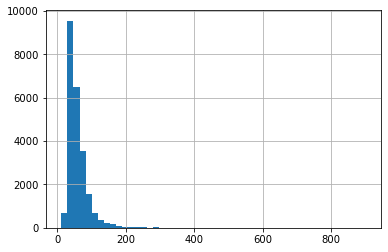

In [17]:
#построим и изучим гистрограмму для общей площади квартир
data['total_area'].hist(bins=50)

Большая часть квартир имеет общую площадь около 50м2, график отдаленно напоминает нормальное распределение, при этом разброс площадей достаточно большой в сторону увеличения вплоть до 400-800 метров с 1-2 квартирами при таких площадях. Для наглядности уменьшу масштаб до площади в 200 м2.

<AxesSubplot:>

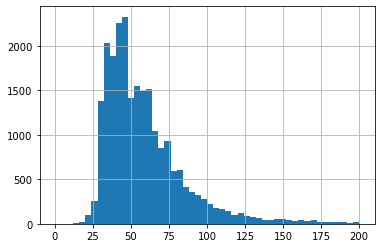

In [18]:
data['total_area'].hist(bins=50, range=(0,200))

In [19]:
print(data.sort_values(by = 'total_area', ascending = False).head(10))
print(data.sort_values(by = 'total_area').head(10))

       total_images  last_price  total_area first_day_exposition  rooms  \
19540             8       420.0       900.0           2017-12-06     12   
12859            20       140.0       631.2           2019-04-09      7   
3117             19       140.0       631.0           2019-03-30      7   
15651            20       300.0       618.0           2017-12-18      7   
5358             20        65.0       590.0           2019-02-14     15   
4237              1        50.0       517.0           2017-10-14      7   
8018             20        84.0       507.0           2015-12-17      5   
15016             8       150.0       500.0           2016-01-13      4   
5893              3       230.0       500.0           2017-05-31      6   
12401            20        91.5       495.0           2017-06-19      7   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
19540            2.80            25        409.7     25          NaN  ...   
12859            3.9

По размеру общей площади есть явные ошибки заполенения (аномально высокая общая площадь и при этом стандартная цена), также есть квартиры с маленькой общей площадью, но эти данные вопросов не вызывают.
Соответсвенно, сузим диапазон данных только по максимуму, оставив значения по общей площади меньше 200 м2.

In [20]:
data['living_area'].describe()

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Выводы в целом аналогичны с выводами по общей площади. Диапазон значений нормального распредления: от 6,3 м2 до 53,7 м2, остальные значения можно считать выбросами.

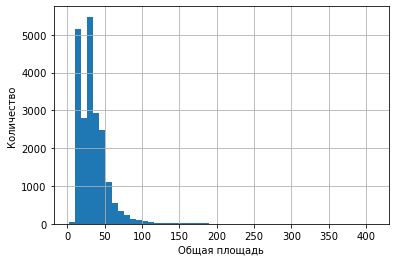

In [21]:
#построим и изучим гистрограмму для жилой площади квартир
data['living_area'].hist(bins=50) 
plt.xlabel("Общая площадь")
plt.ylabel("Количество")
plt.show()

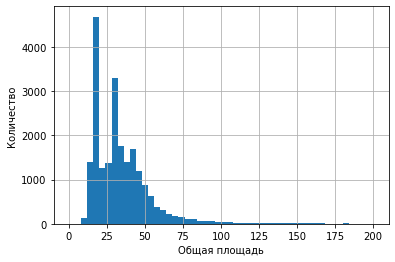

In [22]:
#т.к. видимая часть диапазона площадей попадает по шкале до 200 метров, скорретируем диапазон для гистограммы
data['living_area'].hist(bins=50, range=(0,200))
plt.xlabel("Общая площадь")
plt.ylabel("Количество")
plt.show()

Также как и в общей площади видно 2 пика: один из которых приходится на жилую площадь около 20 м2, второй - около 30 м2. В дальнейшем будем ориентироваться на показатели жилой площади.

In [23]:
data['last_price'].describe()

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price, dtype: float64

Нормальное распределение находится в диапазоне от -1,256 млн. руб. до 8,036 млн. руб. Остальные значения можно считать выбросами.

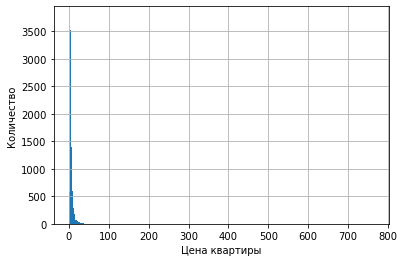

In [24]:
#построим и изучим гистрограмму для цены квартир
data['last_price'].hist(bins=1000)
plt.xlabel("Цена квартиры")
plt.ylabel("Количество")
plt.show()

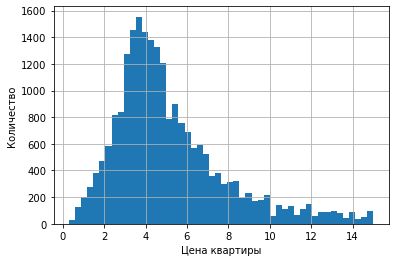

In [25]:
#график получился не очень понятный, видимо, есть большие выбросы. Изменю масштаб осей.
data['last_price'].hist(bins=50, range=(0.3,15))
plt.xlabel("Цена квартиры")
plt.ylabel("Количество")
plt.show()

Из последнего графика можно сделать вывод, что большая часть квартир по стоимости находится в диапазоне 3-5 млн. Есть как аномально низкие, так и очень высокие цены.

In [26]:
print(data.sort_values(by = 'last_price', ascending = False).head(10))
print(data.sort_values(by = 'last_price').head(10))

       total_images  last_price  total_area first_day_exposition  rooms  \
12971            19       763.0       400.0           2017-09-30      7   
19540             8       420.0       900.0           2017-12-06     12   
14706            15       401.3       401.0           2016-02-20      5   
1436             19       330.0       190.0           2018-04-04      3   
15651            20       300.0       618.0           2017-12-18      7   
22831            18    289.2384       187.5           2019-03-19      2   
16461            17       245.0       285.7           2017-04-10      6   
13749             7       240.0       410.0           2017-04-01      6   
5893              3       230.0       500.0           2017-05-31      6   
8900             13      190.87       268.0           2016-03-25      3   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
12971             NaN            10        250.0     10          NaN  ...   
19540            2.8

В этом столбце вызывет вопрос квартиры с малой ценой, потому что по ряду параметров они являются вполне стандартными (обшая площадь, высота потолков, количество комнат). 
Исключим данные с квартирами со стоимостью более 100 млн рублей и меньше 0,5 млн рублей.

In [27]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Нормальное распределение значения комнат от 0 до 5. Т.к. медиана и средняя по значению очень близки, жилья с комнатами превышающими нормальный диапазон очень мало.

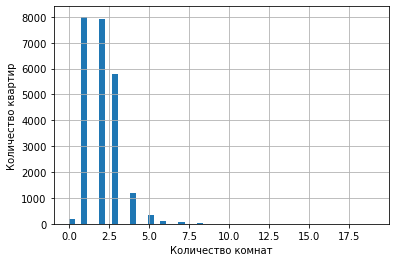

In [28]:
#построим и изучим гистрограмму для числа комнат в квартире
data['rooms'].hist(bins=50)
plt.xlabel("Количество комнат")
plt.ylabel("Количество квартир")
plt.show()

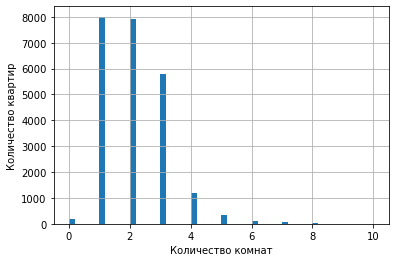

In [29]:
#для наглядности изменим масштаб.
data['rooms'].hist(bins=50, range = (0,10))
plt.xlabel("Количество комнат")
plt.ylabel("Количество квартир")
plt.show()

Вызывают вопросы квартиры с количеством комнат - 0: продается часть комнаты? Но, скорее всего ошибка заполнения данных.
Самые часто встречающиеся количества комнат в порядке убывания: 1, 2, 3, 4, 5 и т.д. Последнее условно значимое значение - 8 комнат.

In [30]:
print(data.sort_values(by = 'rooms', ascending = False).head(10))
print(data.sort_values(by = 'rooms').head(10))

       total_images  last_price  total_area first_day_exposition  rooms  \
14498             6       32.25       374.6           2018-06-09     19   
18848             6        28.5       270.0           2015-03-02     16   
5358             20        65.0       590.0           2019-02-14     15   
20829             6      28.659       245.4           2016-03-31     14   
866               5        25.0       363.0           2017-12-23     14   
19540             8       420.0       900.0           2017-12-06     12   
648               3        17.5       183.7           2018-07-01     11   
9688              8        33.0       194.1           2017-02-07     11   
18891            11        40.0       290.0           2016-06-21     10   
18119             4        15.5       216.1           2016-07-04     10   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
14498             NaN             5        264.5      2          NaN  ...   
18848            3.0

Исходя из отсортированных данных можно предположить, что количество комнат проставлено корректно: квартиры с большим количеством комнат имеют большую площадь, высокую стоимость и достаточную высоту потолков. Квартиры с отсутствием комнат имеют невысокую стоимость, небольшую площадь. Т.к. не указано налчие кухни, то можно предположить, что либо так обозначили студию, либо, что мне кажется более вероятным, - это комната в общежитии или другом общем жилье.

In [31]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Нормальное распределение высоты потолков от 2,36 метров до 2,94 метров. 

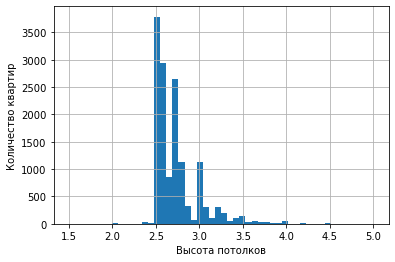

In [32]:
#построим и изучим гистрограмму для высоты потолков в квартире, изменим масштаб для исключения выбросов
data['ceiling_height'].hist(bins=50, range=(1.5,5))
plt.xlabel("Высота потолков")
plt.ylabel("Количество квартир")
plt.show()

Из гистограммы высоты потолков можно сделать вывод, что большая часть квартир имеет высоту 2,5 метра. Есть квартиры с аномально высокими потолками - 4-4,5 метра. Есть квартиры с высотой потолков - 2 метра, что не соответствует стандартам и нормам строительства.

In [33]:
print(data.sort_values(by = 'ceiling_height', ascending = False).head(10))
print(data.sort_values(by = 'ceiling_height').head(10))

       total_images  last_price  total_area first_day_exposition  rooms  \
22869             0        15.0        25.0           2018-07-25      1   
3148             14         2.9        75.0           2018-11-12      3   
22336            19       9.999        92.4           2019-04-05      2   
21377            19         4.9        42.0           2017-04-18      1   
20478            11         8.0        45.0           2017-07-18      1   
22938            14         4.0        98.0           2018-03-15      4   
21824            20        2.45        44.0           2019-02-12      2   
4876              7         3.0        25.0           2017-09-27      0   
10773             8         3.8        58.0           2017-10-13      2   
17857             1         3.9        56.0           2017-12-22      3   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
22869           100.0             5         14.0      5         True  ...   
3148             32.

Потолки в квартире высотой меньше 2 метров маловероятны, также как и потолки высотой более 5 метров. В дальнейшем будем работать с диапазоном высоты потолков от 2 до 5 метров.

In [34]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Нормальное распределение диапазона значений находится в пределах от -91 дня до 281 дня. Важный фактор: медиана и среднее отличаются почти в 2 раза, что говорит о большом количестве значений за пределами нормального распределения. Также очень высокое стандартное отклонение, что показывает отсутствие "стабильности данных".

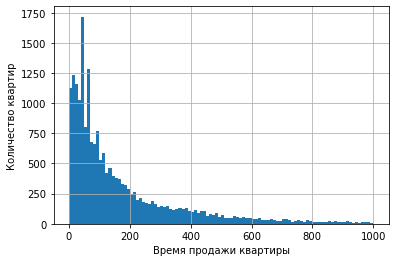

In [35]:
# построим гистограмму по времени продажи квартиры.
data['days_exposition'].hist(bins=100,range=(0,1000))
plt.xlabel("Время продажи квартиры")
plt.ylabel("Количество квартир")
plt.show()

Диапазон очень большой: значения от близких к 0 до 1400 дней. Диаграмма совсем не похожа на нормальное распределение, что говорит о возможных проблемах в данных. 

In [36]:
#посчитаем среднее время продажи квартиры
data['days_exposition'].mean()

180.7413945278023

In [37]:
#посчитаем медианное время продажи квартиры
data['days_exposition'].median()

95.0

In [38]:
len(data[data['days_exposition'] < 30])

3516

In [39]:
print(len(data[data['days_exposition'] < 30]) / len(data))

0.14920432845321452


0    Санкт-Петербург
1     поселок Шушары
2    Санкт-Петербург
3    Санкт-Петербург
4    Санкт-Петербург
Name: locality_name, dtype: object
0.17240364813180348
               too_fast
locality_name          
Бокситогорск   0.285714
Волосово       0.096774
Волхов         0.082353
Всеволожск     0.109145
Выборг         0.105769


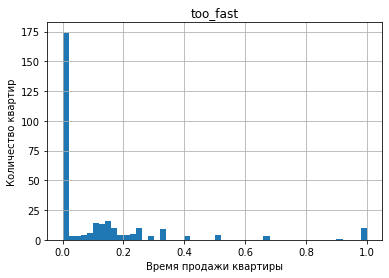

In [40]:
data['too_fast'] = data['days_exposition']<30
print(data['locality_name'].head())
print(data['too_fast'].mean())

too_fast_stat = data.pivot_table(index = 'locality_name', values = 'too_fast')
print(too_fast_stat.head(5))
too_fast_stat.hist(bins=50)
plt.xlabel("Время продажи квартиры")
plt.ylabel("Количество квартир")
plt.show()

Пик графика у 0, значит у большинства продажи не быстрые. Но есть локации, где 100% продаж очень быстрые.

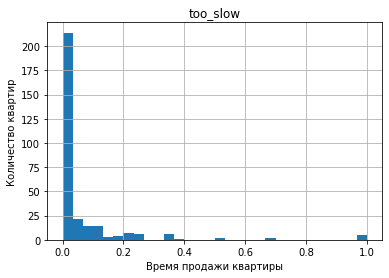

In [41]:
data['too_slow'] = data['days_exposition'] > 600
(
data
    .pivot_table(index='locality_name', values='too_slow')
    .hist(bins=30)
)
plt.xlabel("Время продажи квартиры")
plt.ylabel("Количество квартир")
plt.show()

Таким образом, можно сделать вывод, что время продажи квартиры, стремящееся к 0 и от 600 дней и больше является нетипичным значением.
Для большей точности будем работать с диапазоном от 30 до 600 дней.

Уберем редкие и выбивающиеся значения в соотвествии со сделанными ранее выводами

In [42]:
good_data = data[
                 (data['days_exposition']<= 600) 
                 & (data['days_exposition']>= 30)         
                 & (data['last_price'] >= 0.5) 
                 & (data['last_price']<=100) 
                 & (data['total_area'] <= 200)
                 &(data['ceiling_height'] <=5)
                 &(data['ceiling_height'] >=1)
                 |(data['ceiling_height'].isna()==True)
                ]
print(data.shape)
print(good_data.shape)

(23565, 31)
(18174, 31)


<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Здорово, что ты учла при фильтрации пропущенные значения в ceiling_height 👍
</div>

<AxesSubplot:xlabel='first_day_exposition'>

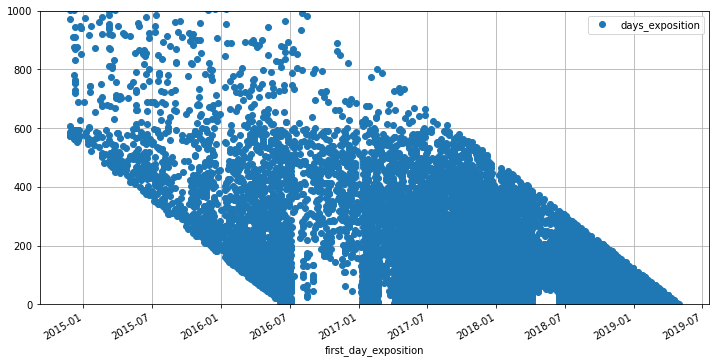

In [43]:
good_data.plot(x='first_day_exposition', y='days_exposition', style='o', ylim=(0, 1000), grid=True, figsize=(12, 6))

Наблюдается страный провал в период с июля 2016 по январь 2017 года. а также между январем 2018 и июлем 2018 года. Как будто бы на продажу выставлялось очень мало квартир. 
Некорректно заведена дата? Была сложная ситуация на рынке и никто не покупал квартиры?

Проверим, есть ли зависимость между временем продажи квартиры и годом старта продаж.

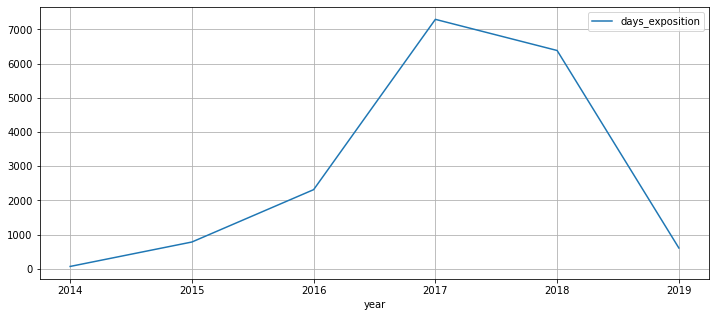

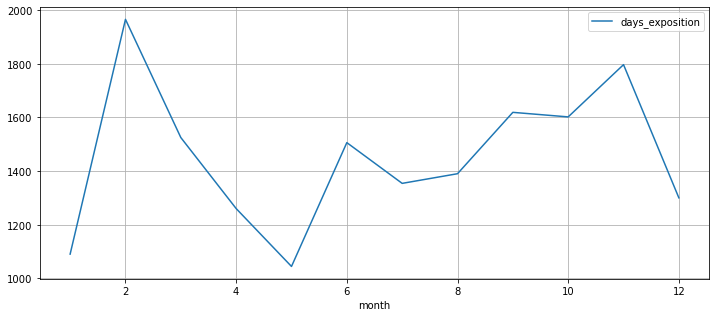

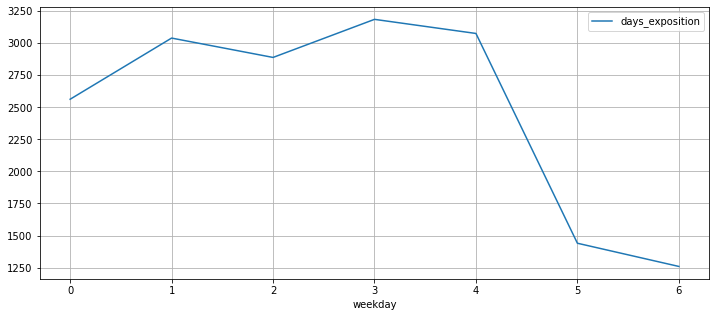

In [44]:
(
good_data.pivot_table(index='year', values = 'days_exposition', aggfunc = 'count')
    .plot(grid=True, figsize=(12,5))
)
plt.show()
(
good_data.pivot_table(index='month', values = 'days_exposition', aggfunc = 'count')
    .plot(grid=True, figsize=(12,5))
)
plt.show()
(
good_data.pivot_table(index='weekday', values = 'days_exposition', aggfunc = 'count')
    .plot(grid=True, figsize=(12,5))
)
plt.show()

В 2017-2018 году резко вырастает время продажи квартиры.
Самый быстрый месяц для продажи квартиры - май, самый долгий - февраль.
Быстрее всего продаются квартиры, выставленные на продажу в пятницу и субботу, медленнее всего - выставленные в среду.

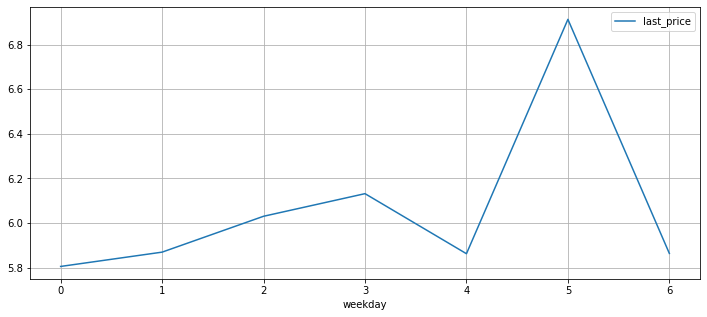

In [45]:
(
good_data.pivot_table(index='weekday', values = 'last_price', aggfunc = 'mean')
    .plot(grid=True, figsize=(12,5))
)
plt.show()

Самые дорогие квартиры выставляют на продажу в пятницу.

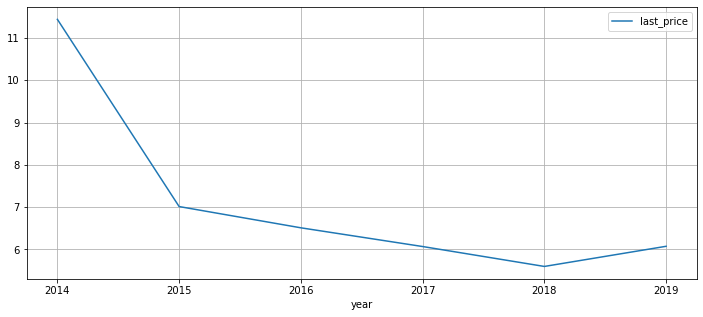

In [46]:
(
good_data.pivot_table(index='year', values = 'last_price', aggfunc = 'mean')
    .plot(grid=True, figsize=(12,5))
)
plt.show()

Самые дорогие квартиры продавались в 2014 году, потом цены пошли на спад и были в диапазоне 5,5-7 млн.

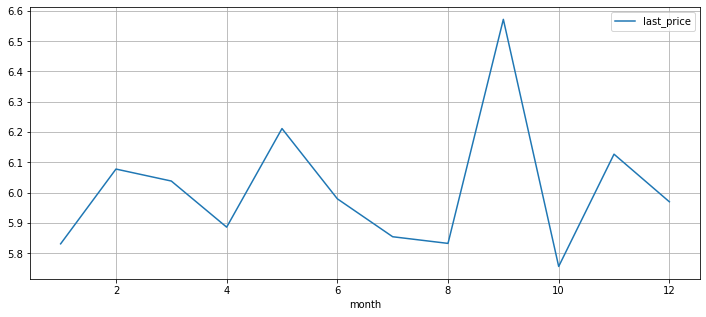

In [47]:
(
good_data.pivot_table(index='month', values = 'last_price', aggfunc = 'mean')
    .plot(grid=True, figsize=(12,5))
)
plt.show()

Особой зависимости не прослеживается, есть несколько пиков на протяжении года, максимальный - в сентябре.

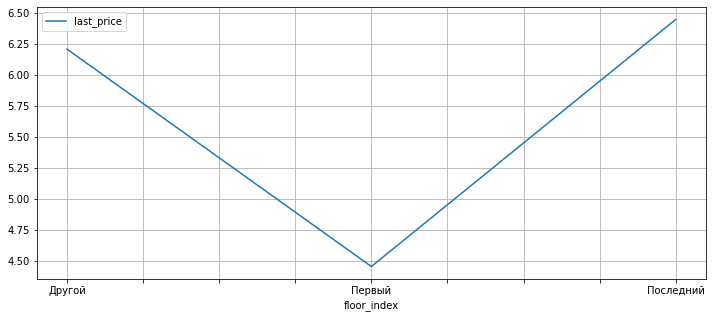

In [48]:
(
good_data.pivot_table(index='floor_index', values = 'last_price', aggfunc = 'mean')
    .plot(grid=True, figsize=(12,5))
)
plt.show()

Есть зависимость между ценой квартиры и стоимостью: провал в ценах наблюдается при продаже квартир, расположенных на 1 этаже. Стоимость квартир на последнем и любом другом этаже не сильно отличается.

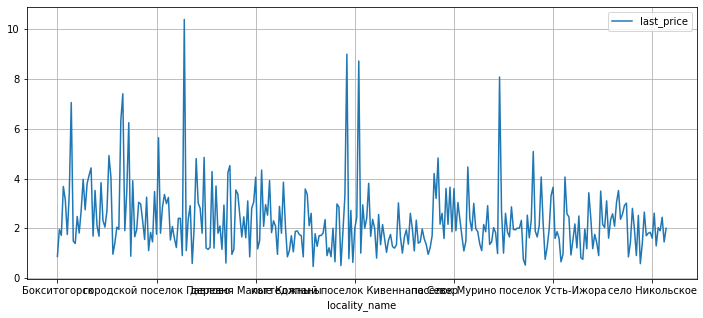

In [49]:
(
good_data.pivot_table(index='locality_name', values = 'last_price', aggfunc = 'mean')
    .plot(grid=True, figsize=(12,5))
)
plt.show()

Видно, что в зависимости от места расположения наблюдаются пики и провалы в стоимости.

In [50]:
good_data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,ponds_nearest,days_exposition,weekday,month,year,price_per_m,living_to_total_area,kitchen_to_total_area,too_fast,too_slow
total_images,1.000000,0.091409,0.114138,0.093669,0.041094,0.006980,0.102318,0.029347,-0.026352,-0.021718,...,0.005680,-0.014824,-0.003634,0.020898,0.124261,0.124311,-0.003136,-0.025533,-0.030727,-0.033195
last_price,0.091409,1.000000,0.596681,0.326117,0.463955,0.010618,0.506478,0.034447,-0.026356,-0.013840,...,-0.058074,0.069395,0.014105,0.002629,-0.042878,0.730816,0.001293,-0.084738,-0.019884,0.038594
total_area,0.114138,0.596681,1.000000,0.763910,0.455723,-0.065376,0.929869,-0.026725,-0.081951,-0.050106,...,-0.078685,0.128244,0.005673,-0.001642,-0.073170,0.286018,0.154398,-0.331171,-0.050934,0.053160
rooms,0.093669,0.326117,0.763910,1.000000,0.236674,-0.228814,0.855065,-0.160267,-0.153477,-0.096716,...,-0.039163,0.092107,0.000574,-0.003960,-0.060078,0.022578,0.496718,-0.606930,-0.050487,0.025602
ceiling_height,0.041094,0.463955,0.455723,0.236674,1.000000,-0.066153,0.393104,-0.033049,0.012275,0.009616,...,-0.136606,0.096968,-0.010091,-0.011962,-0.087663,0.367538,-0.045325,0.041616,NaN,NaN
floors_total,0.006980,0.010618,-0.065376,-0.228814,-0.066153,1.000000,-0.172821,0.679293,0.073461,0.054855,...,0.034400,-0.040693,0.015655,0.011216,0.020205,0.184633,-0.363697,0.353556,0.039722,-0.005031
living_area,0.102318,0.506478,0.929869,0.855065,0.393104,-0.172821,1.000000,-0.109829,-0.062686,-0.038169,...,-0.053406,0.117869,0.008801,-0.010721,-0.072598,0.190588,0.458972,-0.517147,-0.053612,0.044238
floor,0.029347,0.034447,-0.026725,-0.160267,-0.033049,0.679293,-0.109829,1.000000,0.035241,0.039757,...,0.013502,-0.031717,0.011061,0.016877,0.014379,0.157871,-0.268079,0.253136,0.027696,-0.007191
studio,-0.026352,-0.026356,-0.081951,-0.153477,0.012275,0.073461,-0.062686,0.035241,1.000000,-0.004691,...,0.003259,-0.026866,-0.005130,-0.003417,0.020608,0.020281,0.088414,NaN,0.027805,-0.012543
open_plan,-0.021718,-0.013840,-0.050106,-0.096716,0.009616,0.054855,-0.038169,0.039757,-0.004691,1.000000,...,-0.005376,-0.025672,0.013403,0.024797,-0.019335,0.012843,0.071354,NaN,0.031420,-0.009243


Прослеживается зависимость между стоимостью квартиры и общей площадью (коэффициент корреляции составляет 0,6), между высотой потолков и стоимостью (0,4), между площадью кухни и жилой зоны и стоимостью (0,5 в обоих случаях).
Корреляция в зависимости от удаленности от центра отрицательная, то есть чем дальше от центра, тем ниже цена.

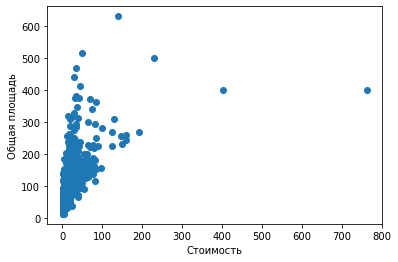

In [51]:
plt.scatter(good_data['last_price'],good_data['total_area'])
plt.xlabel("Стоимость")
plt.ylabel("Общая площадь")
plt.show()
plt.show()

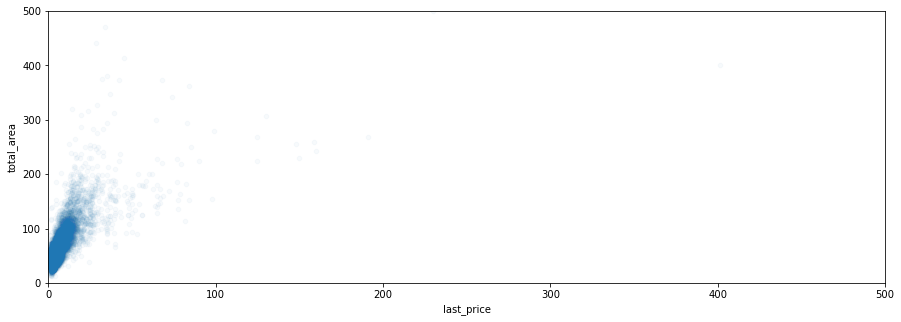

In [52]:
good_data.plot(x='last_price', y='total_area', kind = 'scatter', alpha = 0.03, xlim = (0,500), ylim = (0,500), figsize=(15,5))
plt.show()

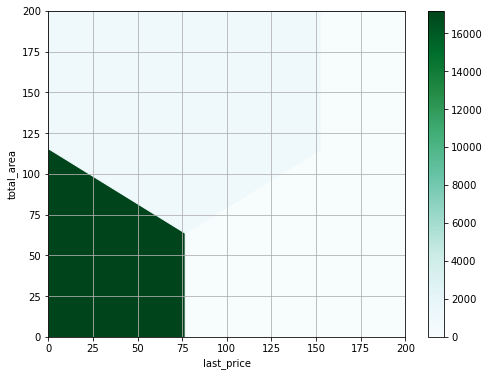

In [53]:
good_data.plot(x='last_price', y='total_area', kind = 'hexbin', alpha = 1, gridsize = 5, figsize = (8,6), sharex = False, grid = True, xlim = (0,200), ylim = (0,200))
plt.show()

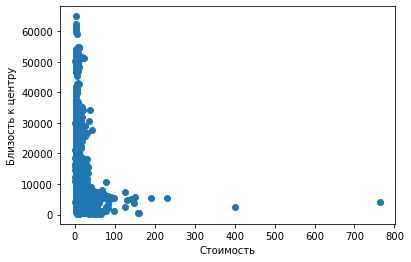

In [54]:
plt.scatter(good_data['last_price'],good_data['cityCenters_nearest'])
plt.xlabel("Стоимость")
plt.ylabel("Близость к центру")
plt.show()

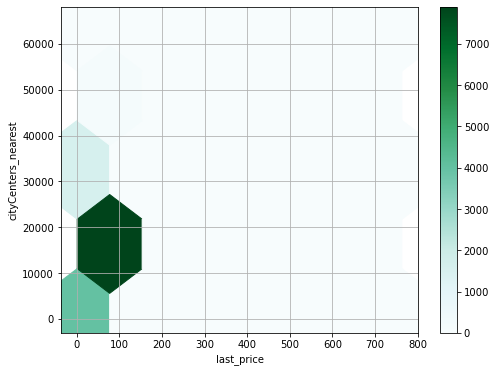

In [55]:
good_data.plot(x='last_price', y='cityCenters_nearest', kind = 'hexbin', alpha = 1, gridsize = 5, figsize = (8,6), sharex = False, grid = True)
plt.show()

<b> Комментарий от студента </b>
    По этому графику видно интересную зависимость, что большая часть дорогих квартир располагается вовсе не в центре города.

In [56]:
value_counts = good_data['locality_name'].value_counts().head(10)
value_counts

Санкт-Петербург      11771
поселок Мурино         496
поселок Шушары         380
Всеволожск             316
поселок Парголово      283
Пушкин                 278
Колпино                271
деревня Кудрово        261
Гатчина                251
Выборг                 203
Name: locality_name, dtype: int64

In [57]:
# преобразование в df и присвоение новых имен колонкам
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['locality_name', 'quantity']
df_value_counts_locality = df_value_counts['locality_name']
print(df_value_counts_locality)

0      Санкт-Петербург
1       поселок Мурино
2       поселок Шушары
3           Всеволожск
4    поселок Парголово
5               Пушкин
6              Колпино
7      деревня Кудрово
8              Гатчина
9               Выборг
Name: locality_name, dtype: object


In [58]:
good_data['locality_name'].value_counts().head(10).index.to_list()

['Санкт-Петербург',
 'поселок Мурино',
 'поселок Шушары',
 'Всеволожск',
 'поселок Парголово',
 'Пушкин',
 'Колпино',
 'деревня Кудрово',
 'Гатчина',
 'Выборг']

In [59]:
top_ten_data = good_data.query('locality_name in @df_value_counts_locality')
display(top_ten_data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,weekday,month,year,price_per_m,living_to_total_area,kitchen_to_total_area,floor_index,too_fast,too_slow
1,7,3.35,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,81,1,12,2018,82920.79,0.46,0.27,Первый,False,False
2,10,5.196,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,558,3,8,2015,92785.71,0.61,0.15,Другой,False,False
3,0,64.9,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,424,4,7,2015,408176.1,NaN,NaN,Другой,False,False
4,2,10.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,121,1,6,2018,100000.0,0.32,0.41,Другой,False,False
6,6,3.7,37.3,2017-11-02,1,NaN,26,10.6,6,NaN,...,155,3,11,2017,99195.71,0.28,0.39,Другой,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,11,2.35,35.6,2016-06-23,1,2.50,5,17.0,4,False,...,40,3,6,2016,66011.24,0.48,0.23,Другой,False,False
23686,8,3.3,31.0,2017-04-29,1,2.55,9,18.0,6,NaN,...,193,5,4,2017,106451.61,0.58,0.21,Другой,False,False
23687,6,3.2,39.0,2017-12-16,1,NaN,9,20.0,6,NaN,...,38,5,12,2017,82051.28,0.51,0.28,Другой,False,False
23690,3,5.5,52.0,2018-07-19,2,NaN,5,31.0,2,NaN,...,15,3,7,2018,105769.23,0.60,0.12,Другой,True,False


In [60]:
top_ten_stat = top_ten_data.pivot_table(index='locality_name', values='price_per_m', aggfunc='mean').sort_values(by='price_per_m', ascending=False)
print(top_ten_stat)

                     price_per_m
locality_name                   
Санкт-Петербург    112189.695364
Пушкин             102159.955288
деревня Кудрово     93027.201686
поселок Парголово   89527.519965
поселок Мурино      85141.320282
поселок Шушары      77997.416132
Колпино             74308.212731
Всеволожск          68464.447373
Гатчина             68226.568645
Выборг              57393.722414


Самая высокая стоимость жилья в Санкт-Петербурге, самая низкая - в Выборге.

In [61]:
print('Общее число пропущенных значений Расстояние до центра:', good_data['cityCenters_nearest'].isna().sum())


Общее число пропущенных значений Расстояние до центра: 4458


In [62]:
good_data_no_cc = good_data[(good_data['cityCenters_nearest'].isna()==True)]
print(good_data_no_cc['locality_name'].value_counts().head(10))
print(good_data_no_cc['locality_name'].sort_values().unique())#data_no_city_center_nearest=good_data.query('cityCenters_nearest'].isna())

поселок Мурино             496
Всеволожск                 316
деревня Кудрово            261
Гатчина                    251
Выборг                     203
Кудрово                    138
деревня Новое Девяткино    112
Сертолово                  109
поселок Бугры              100
Кингисепп                   97
Name: locality_name, dtype: int64
['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши' 'Кировск'
 'Колпино' 'Коммунар' 'Красное Село' 'Кудрово' 'Лодейное Поле' 'Ломоносов'
 'Луга' 'Любань' 'Мурино' 'Никольское' 'Новая Ладога' 'Отрадное'
 'Пикалево' 'Подпорожье' 'Приморск' 'Приозерск' 'Санкт-Петербург'
 'Светогорск' 'Сертолово' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Будогощь' 'городской поселок Виллози'
 'городской поселок Лесогорский' 'городской поселок Мга'
 'городской поселок Назия' 'городской поселок Новоселье'
 'городской п

Информация по расстоянию до центра пропущена у небольших населенных пунктов.
Проверим, у каких населенных пунктов всегда есть расстояние до центра.

In [63]:
good_data_with_cc = good_data[(good_data['cityCenters_nearest'].isna()==False)]
print(good_data_with_cc['locality_name'].value_counts().head(10))
print(good_data_with_cc['locality_name'].sort_values().unique())

Санкт-Петербург      11733
поселок Шушары         377
поселок Парголово      283
Пушкин                 278
Колпино                270
Петергоф               147
Сестрорецк             143
Красное Село           135
Ломоносов               95
Кронштадт               80
Name: locality_name, dtype: int64
['Зеленогорск' 'Колпино' 'Красное Село' 'Кронштадт' 'Ломоносов' 'Павловск'
 'Петергоф' 'Пушкин' 'Санкт-Петербург' 'Сестрорецк'
 'поселок Александровская' 'поселок Белоостров' 'поселок Левашово'
 'поселок Лисий Нос' 'поселок Металлострой' 'поселок Молодежное'
 'поселок Парголово' 'поселок Песочный' 'поселок Петро-Славянка'
 'поселок Понтонный' 'поселок Репино' 'поселок Саперный'
 'поселок Стрельна' 'поселок Усть-Ижора' 'поселок Шушары']


У части насленных пунктов есть как недвижимость с заполненной графой 'Расстояние до центра', так и с пропусками в этой графе. В Санкт-Петербурге это значение всегда заполнено.

In [64]:
good_data_Spb = good_data.query('locality_name=="Санкт-Петербург"')
display(good_data_Spb)
good_data_Spb['locality_name'].value_counts()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,weekday,month,year,price_per_m,living_to_total_area,kitchen_to_total_area,floor_index,too_fast,too_slow
2,10,5.196,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,558,3,8,2015,92785.71,0.61,0.15,Другой,False,False
3,0,64.9,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,424,4,7,2015,408176.1,NaN,NaN,Другой,False,False
4,2,10.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,121,1,6,2018,100000.0,0.32,0.41,Другой,False,False
7,5,7.915,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,...,<NA>,3,4,2019,110544.69,NaN,0.26,Другой,<NA>,<NA>
9,18,5.4,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,289,6,2,2017,88524.59,0.71,0.11,Другой,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23681,13,5.25,43.0,2018-05-11,2,2.50,5,29.0,2,NaN,...,80,4,5,2018,122093.02,0.67,0.14,Другой,False,False
23686,8,3.3,31.0,2017-04-29,1,2.55,9,18.0,6,NaN,...,193,5,4,2017,106451.61,0.58,0.21,Другой,False,False
23687,6,3.2,39.0,2017-12-16,1,NaN,9,20.0,6,NaN,...,38,5,12,2017,82051.28,0.51,0.28,Другой,False,False
23690,3,5.5,52.0,2018-07-19,2,NaN,5,31.0,2,NaN,...,15,3,7,2018,105769.23,0.60,0.12,Другой,True,False


Санкт-Петербург    11771
Name: locality_name, dtype: int64

In [65]:
good_data_Spb['cityCenters_nearest'] = (good_data_Spb['cityCenters_nearest']/1000).round(0).astype('Int64')
mean_city_Spb = good_data_Spb.pivot_table(index='cityCenters_nearest', values = 'last_price', aggfunc = 'mean')
display(mean_city_Spb)

,last_price
cityCenters_nearest,
0,30.540396
1,15.722164
2,15.810819
3,10.091316
4,12.473892
5,12.926805
6,13.100646
7,12.888488
8,8.697192


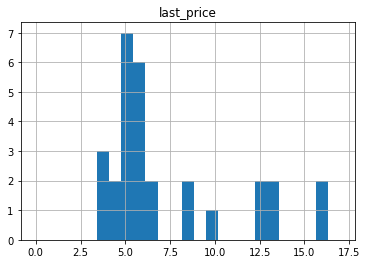

In [66]:
mean_city_Spb.hist(bins=25, range=(0,17))
plt.show()

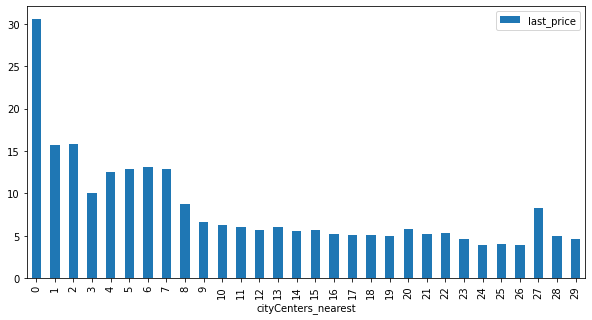

In [67]:
mean_city_Spb.plot(kind='bar', y='last_price', figsize = (10,5))
plt.show()

Недвижимостью в центральной части города будем считать ту, что удалена от центра максимум на 6 км.

In [68]:
good_data_Spb_centre = good_data_Spb[good_data_Spb['cityCenters_nearest']<6]
good_data_Spb_centre['total_area'].describe()

count    1772.000000
mean       88.895152
std        49.772987
min        12.000000
25%        58.450000
50%        78.750000
75%       106.000000
max       631.000000
Name: total_area, dtype: float64

In [69]:
good_data_Spb['total_area'].describe()

count    11771.000000
mean        62.096810
std         33.477568
min         12.000000
25%         41.360000
50%         54.000000
75%         72.000000
max        631.000000
Name: total_area, dtype: float64

Вывод: квартиры в центре Санкт-Петербурга больше по общей площади.
Средний размер общей площади в центре составляет - 89 м2, медианный - 79 м2. Для всего Санкт-Петербурга эти величины соствляют 62 м2 и 54 м2 соответственно.

In [70]:
display(good_data_Spb_centre['last_price'].describe())
display(good_data_Spb['last_price'].describe())

count    1772.000000
mean       13.129311
std        24.587235
min         1.686000
25%         6.693750
50%         8.975500
75%        13.200000
max       763.000000
Name: last_price, dtype: float64

count    11771.000000
mean         7.409931
std         11.067064
min          1.190000
25%          4.127500
50%          5.350000
75%          7.800000
max        763.000000
Name: last_price, dtype: float64

Средняя стоимость квартиры в центре Санкт-Петербурга почти в 2 раза выше, чем по городу в целом (13 млн. руб. и 7,4 млн. руб. соответственно).
Медианное значение также выше - почти 9 млн. в центре и 5,35 млн. по Петербургу в целом.

In [71]:
display(good_data_Spb_centre['rooms'].describe())
display(good_data_Spb['rooms'].describe())

count    1772.000000
mean        2.819977
std         1.357908
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

count    11771.000000
mean         2.108147
std          1.065060
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В центре города расположены квартиры с большим средним и медианным числом комнат (2,8 и 3) по сравнению со всем Санкт-Петербургом (2,1 и 2, соответственно).

In [72]:
display(good_data_Spb_centre['ceiling_height'].describe())
display(good_data_Spb['ceiling_height'].describe())

count    936.000000
mean       3.109135
std        0.338562
min        2.400000
25%        2.900000
50%        3.050000
75%        3.300000
max        4.800000
Name: ceiling_height, dtype: float64

count    6216.000000
mean        2.746301
std         0.271730
min         1.750000
25%         2.550000
50%         2.700000
75%         2.800000
max         4.800000
Name: ceiling_height, dtype: float64

Высота потолков в центре города выше и составляет более 3 метров (как средняя, так и медианная), тогда как во всем городе средняя и медианная высота потолков составляет 2,7 м.

In [73]:
corr_Spb_centre = good_data_Spb_centre.corr()
corr_Spb = good_data_Spb.corr()
display(corr_Spb_centre)
corr_Spb

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,ponds_nearest,days_exposition,weekday,month,year,price_per_m,living_to_total_area,kitchen_to_total_area,too_fast,too_slow
total_images,1.000000,0.096744,0.070782,0.034637,0.054542,-0.046753,0.051903,-0.026063,-0.025236,-0.024103,...,0.073823,-0.049027,0.043690,-0.007651,0.175759,0.131847,-0.031164,0.050744,-0.031088,-0.066539
last_price,0.096744,1.000000,0.539477,0.246609,0.129361,0.062714,0.447577,0.136910,-0.018753,-0.011051,...,-0.021004,0.036506,0.051355,-0.022311,-0.012899,0.808890,0.010165,-0.087046,-0.020875,0.029025
total_area,0.070782,0.539477,1.000000,0.725845,0.232506,0.016923,0.928676,0.126693,-0.063218,-0.024548,...,-0.035672,0.097190,0.039500,-0.062441,-0.024419,0.227948,0.184191,-0.343170,-0.096401,0.018667
rooms,0.034637,0.246609,0.725845,1.000000,0.186129,-0.159446,0.821605,-0.039837,-0.102664,-0.014763,...,-0.025499,0.050075,0.021861,-0.046349,-0.015963,-0.045592,0.440388,-0.503506,-0.087119,-0.007277
ceiling_height,0.054542,0.129361,0.232506,0.186129,1.000000,-0.228734,0.252764,-0.150376,-0.035649,0.009007,...,-0.032220,0.049601,0.036091,-0.034573,-0.072343,0.019298,0.120418,-0.106835,NaN,NaN
floors_total,-0.046753,0.062714,0.016923,-0.159446,-0.228734,1.000000,-0.129930,0.674059,0.010722,-0.014855,...,0.112889,0.064854,0.004702,0.012736,-0.056673,0.146063,-0.337583,0.161852,0.049422,0.073636
living_area,0.051903,0.447577,0.928676,0.821605,0.252764,-0.129930,1.000000,-0.002409,-0.059095,-0.010891,...,-0.010422,0.090624,0.038310,-0.042179,-0.053937,0.168797,0.479275,-0.494925,-0.097543,0.006662
floor,-0.026063,0.136910,0.126693,-0.039837,-0.150376,0.674059,-0.002409,1.000000,-0.007044,-0.033596,...,0.052514,0.077054,0.015046,0.034573,-0.069412,0.173038,-0.214679,0.055654,0.031838,0.087574
studio,-0.025236,-0.018753,-0.063218,-0.102664,-0.035649,0.010722,-0.059095,-0.007044,1.000000,-0.002191,...,0.035197,-0.044799,-0.003125,-0.015676,0.017676,0.008942,0.027325,NaN,0.027825,-0.013070
open_plan,-0.024103,-0.011051,-0.024548,-0.014763,0.009007,-0.014855,-0.010891,-0.033596,-0.002191,1.000000,...,-0.045699,-0.022374,0.027711,0.028242,-0.043971,-0.011835,0.065893,NaN,0.043603,-0.010118


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,ponds_nearest,days_exposition,weekday,month,year,price_per_m,living_to_total_area,kitchen_to_total_area,too_fast,too_slow
total_images,1.000000,0.080293,0.095440,0.071236,0.023672,0.016382,0.083569,0.034594,-0.018633,-0.008562,...,0.004307,-0.022516,0.005405,0.023063,0.135250,0.109424,-0.017060,-0.015156,-0.037240,-0.034273
last_price,0.080293,1.000000,0.600433,0.331121,0.445787,-0.045403,0.511484,0.004656,-0.025349,-0.010445,...,-0.062979,0.076779,0.022355,-0.003586,-0.033706,0.768228,0.003996,-0.093788,-0.027249,0.041557
total_area,0.095440,0.600433,1.000000,0.760471,0.469461,-0.096369,0.931624,-0.036737,-0.072283,-0.040994,...,-0.093538,0.144767,0.014073,-0.009556,-0.067526,0.291587,0.150180,-0.319989,-0.063779,0.058536
rooms,0.071236,0.331121,0.760471,1.000000,0.269594,-0.259537,0.850671,-0.169769,-0.143196,-0.079927,...,-0.052890,0.099754,0.000732,-0.006278,-0.058478,0.011039,0.496632,-0.592484,-0.049803,0.029219
ceiling_height,0.023672,0.445787,0.469461,0.269594,1.000000,-0.169906,0.417182,-0.092770,0.013135,0.019183,...,-0.144201,0.125113,-0.012056,-0.017322,-0.097999,0.330601,-0.025603,0.012043,NaN,NaN
floors_total,0.016382,-0.045403,-0.096369,-0.259537,-0.169906,1.000000,-0.202038,0.647492,0.064173,0.047281,...,0.007818,-0.036658,0.030757,-0.007661,0.040569,0.035775,-0.383144,0.329547,0.018544,-0.007196
living_area,0.083569,0.511484,0.931624,0.850671,0.417182,-0.202038,1.000000,-0.115347,-0.054948,-0.030340,...,-0.065985,0.133637,0.014994,-0.015907,-0.070614,0.196269,0.448748,-0.501057,-0.066413,0.051430
floor,0.034594,0.004656,-0.036737,-0.169769,-0.092770,0.647492,-0.115347,1.000000,0.021855,0.045223,...,-0.000239,-0.022962,0.019596,0.004529,0.022798,0.068592,-0.262645,0.226674,0.020002,-0.001235
studio,-0.018633,-0.025349,-0.072283,-0.143196,0.013135,0.064173,-0.054948,0.021855,1.000000,-0.003829,...,0.002907,-0.021854,-0.006976,0.004981,0.018096,0.017020,0.085078,NaN,0.033789,-0.011977
open_plan,-0.008562,-0.010445,-0.040994,-0.079927,0.019183,0.047281,-0.030340,0.045223,-0.003829,1.000000,...,-0.012889,-0.026233,0.014487,0.025942,-0.014551,0.015651,0.080060,NaN,0.008623,-0.008457


Цена в центре города зависит прежде всего от площади квартиры, другие факторы оказвают очень маленькое влияние. На стоимость квартир в Санкт-Петербурге в целом влияет помимо площади высота потолков, количество комнат.
Удаленность от центра имеет отрицательную корреляцию с ценой для квартиры по Санкт-Петербургу в целом и почти не оказывает влияния на стоимость квартир в центре города.

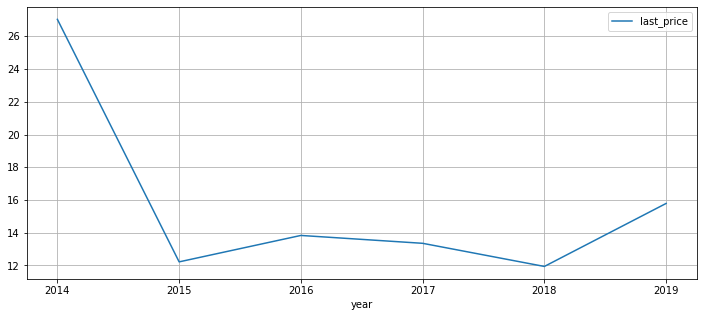

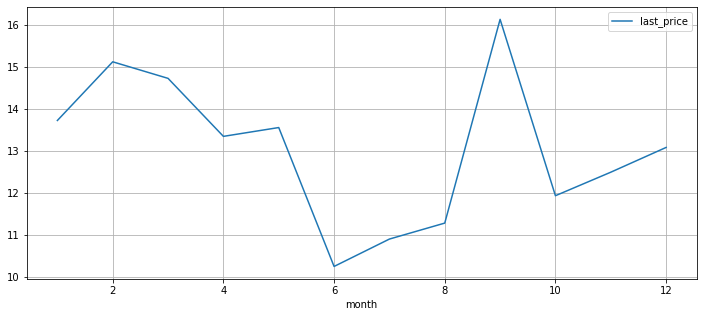

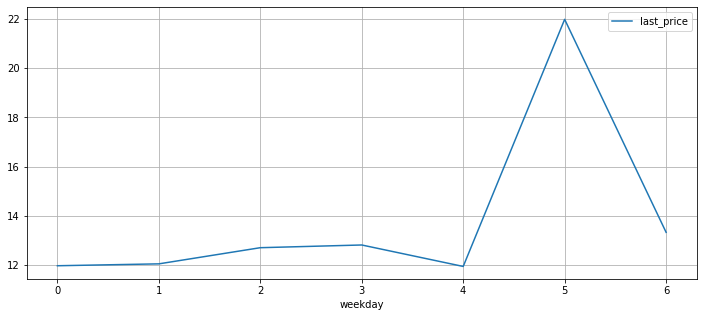

In [74]:
(
good_data_Spb_centre.pivot_table(index='year', values = 'last_price', aggfunc = 'mean')
    .plot(grid=True, figsize=(12,5))
)
plt.show()
(
good_data_Spb_centre.pivot_table(index='month', values = 'last_price', aggfunc = 'mean')
    .plot(grid=True, figsize=(12,5))
)
plt.show()
(
good_data_Spb_centre.pivot_table(index='weekday', values = 'last_price', aggfunc = 'mean')
    .plot(grid=True, figsize=(12,5))
)
plt.show()

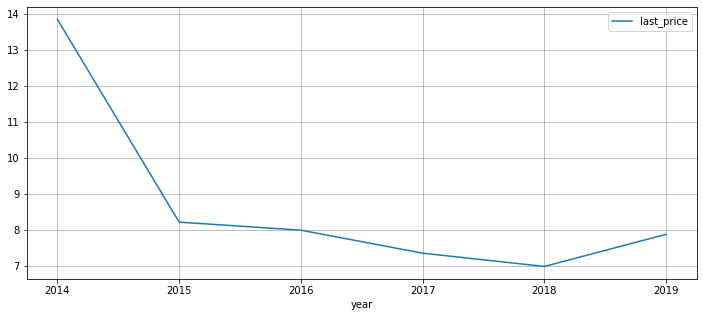

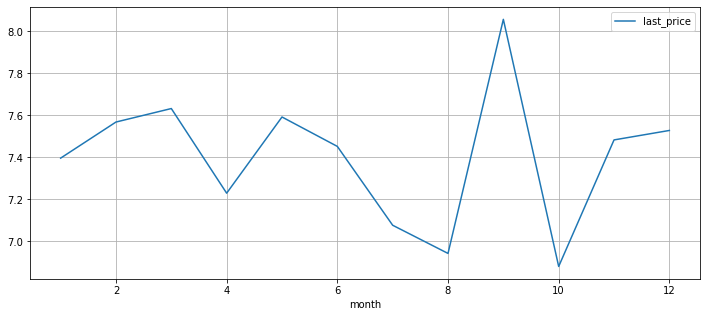

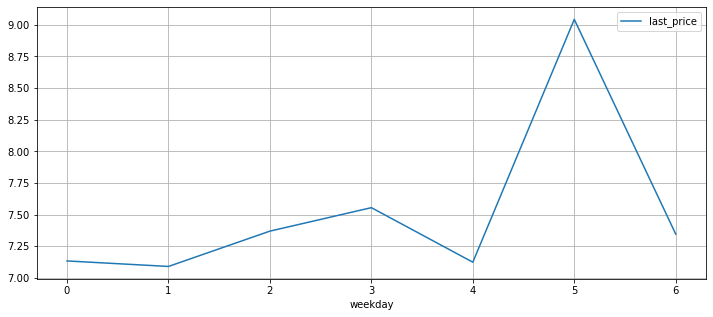

In [75]:
(
good_data_Spb.pivot_table(index='year', values = 'last_price', aggfunc = 'mean')
    .plot(grid=True, figsize=(12,5))
)
plt.show()
(
good_data_Spb.pivot_table(index='month', values = 'last_price', aggfunc = 'mean')
    .plot(grid=True, figsize=(12,5))
)
plt.show()
(
good_data_Spb.pivot_table(index='weekday', values = 'last_price', aggfunc = 'mean')
    .plot(grid=True, figsize=(12,5))
)
plt.show()

Как по Санкт-Петербургу в целом, так и по центру города можно отметить, что квартиры с наиболее высокой ценой выставляются по пятницам и чаще в сентябре. 

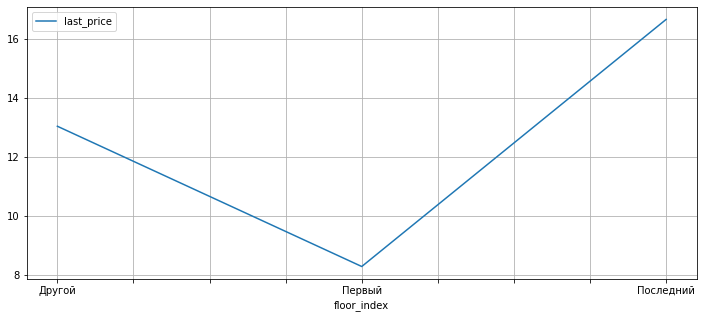

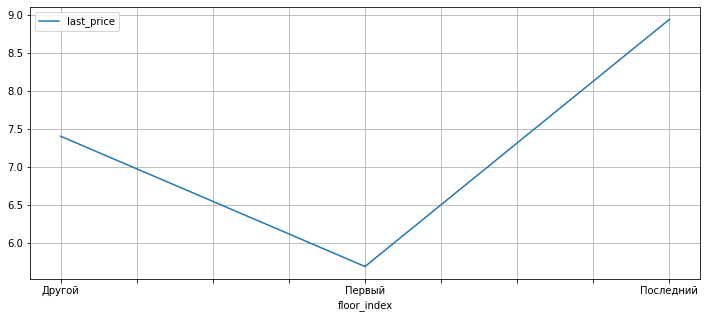

In [76]:
(
good_data_Spb_centre.pivot_table(index='floor_index', values = 'last_price', aggfunc = 'mean')
    .plot(grid=True, figsize=(12,5))
)
plt.show()

(
good_data_Spb.pivot_table(index='floor_index', values = 'last_price', aggfunc = 'mean')
    .plot(grid=True, figsize=(12,5))
)
plt.show()

Как в центре Санкт-Петербурга, так и для города в целом наблюдаем ситуацию, что квартиры на первой этаже имеют минимальную стоимость, а квартиры на последнем этаже - максимальную.

## Общий вывод

### Изучение данных из файла

Всего в таблице 26399 шт. строки и 25 стобцов.<br>
Явных дубликатов в таблице нет.<br>
Пропуски данных есть в большом количестве столбцов.<br>
Часть пропусков останется в незаполненном виде, чтобы не оказать сильного влияния на результат анализа.<br>
Часть значений вызывает вопросы по корректности заполения данных.<br>

### Предобработка данных

Были изменены только **пропуски в наличии балкона на 0** при отсутствии других значений.<br>

**Удалены строки с пропусками** в столбцах:
 * locality_name
 * floors_total
т.к. общий обьем удаленных строк в этом случае был **около 0,5%** и не оказывал существенного влияния на итоговый анализ.<br>

Большое количество вариантов в **locality_name** было сокращено за счет **замены "ё" на "е"**.<br>

Изменены на **целочисленные значения**:
 * балконов, 
 * этажей, 
 * комнат, 
 * парков и прудов, 
 * стоимость,
 * дни экспозиции.<br>

Дата размещения переведена в **формат даты**.<br>

### Расчеты и добавления результатов в таблицу

В таблицу были добавлены столбцы со следующими данными:
 - день недели, месяц, год
 - цена м2
 - соотношение жилой и общей площади
 - соотношение площади кухни к общей
 - категория этажа расположения квартиры 'Первый', 'Последний', 'Другой'

**Стоимость квартиры** изменена на **млн. руб.** 

### Исследовательский анализ данных

Проведено исследование ряда заполненных характеристик квартиры (общей и жилой площади, высоты потолков, количества комнат), построены гистограммы для данных величин.

По **размеру общей площади** выявлены явные ошибки заполенения (аномально высокая общая площадь и при этом стандартная цена). По общей площади оставили значения меньше 200 м2.<br>

Большая часть квартир по **стоимости** находится в диапазоне **3-5 млн.руб.** Есть как аномально низкие, так и очень высокие цены. 
Исключим данные с квартирами со стоимостью более 100 млн рублей и меньше 0,5 млн рублей.<br>

Нормальное распределение значения **количества комнат от 0 до 5**. Т.к. медиана и средняя по значению очень близки, жилья с комнатами превышающими нормальный диапазон очень мало. Оставим строки со значением комнат от 0 до 5.<br>

Большая часть квартир имеет **высоту потолков 2,5 метра**. Есть квартиры с аномально высокими потолками - 4-4,5 метра. Есть квартиры с высотой потолков - 2 метра, что не соответствует стандартам и нормам строительства.<br>
Потолки в квартире высотой меньше 2 метров маловероятны, также как и потолки высотой более 5 метров. В дальнейшем будем работать с диапазоном высоты потолков от 2 до 5 метров.<br>

Нормальное распределение диапазона значений по количеству дней экспозиции находится в пределах от -91 дня до 281 дня. Важный фактор: медиана и среднее отличаются почти в 2 раза, что говорит о большом количестве значений за пределами нормального распределения. Также очень высокое стандартное отклонение, что показывает отсутствие "стабильности данных".<br>
Время продажи квартиры, стремящееся к 0 и от 600 дней и больше является нетипичным значением. Для большей точности будем работать с диапазоном **от 30 до 600 дней**.<br>

После того, как были убраны редкие и выбивающиеся значения в соотвествии со сделанными ранее выводами из 23565 строк осталось 18174 строки (22% данных).<br>

В **пероде размещения** объявлений наблюдается страный **провал с июля 2016 по январь 2017 года**, а также между **январем 2018 и июлем 2018 года**. <br>

Самый **"быстрый" месяц** для продажи квартиры - **май**, самый **долгий - февраль**.<br>

Быстрее всего продаются квартиры, выставленные на продажу **в пятницу и субботу**, медленнее всего - выставленные в среду.<br>

Самые **дорогие квартиры** выставляют на продажу в **пятницу**.<br>

Самая высокая цена на квартиры наблюдалась в 2014 году, потом цены пошли на спад и были **в диапазоне 5,5-7 млн.**

Есть зависимость между ценой квартиры и **этажом расположения**: провал в ценах наблюдается при продаже квартир, расположенных на 1 этаже. Стоимость квартир на последнем и любом другом этаже не сильно отличается.<br>
<br>
В зависимости от места расположения наблюдаются пики и провалы в стоимости. Среди топ-10 квартир с максимальным числом объявлений на продажу самая высокая стоимость жилья в Санкт-Петербурге, самая низкая - в Выборге.<br>
<br>
Корреляция в зависимости от удаленности от центра отрицательная, то есть чем дальше от центра, тем ниже цена.<br>

Прослеживается **зависимость между стоимостью квартиры** и:
- общей площадью (коэффициент корреляции составляет 0,6),
- высотой потолков и стоимостью (0,4),
- площадью кухни и жилой зоны(0,5 в обоих случаях).

**Расстояние до центра:**
* пропущено у небольших населенных пунктов,<br>
* в Санкт-Петербурге это значение всегда заполнено.<br>

#### Сравнительный анализ недвижимости по Санкт-Петербургу в целом и центральной части города<br>

Недвижимостью **в центральной части города** будем считать ту, что удалена от центра максимум на 6 км.<br>
<br>
Квартиры в центре Санкт-Петербурга больше по **общей площади**:
* средний размер общей площади в центре составляет - 89 м2, медианный - 79 м2. 
* для всего Санкт-Петербурга эти величины соствляют 62 м2 и 54 м2 соответственно.

**Cтоимость квартиры** в центре Санкт-Петербурга выше, чем по городу в целом:
* по средней стоимости в 2 раза: 13 млн. руб. и 7,4 млн. руб. соответственно,
* по медианной стоимости почти в 1,5 раза: 9 млн. и 5,35 млн. соответственно.<br>

**Число комнат** в центре города больше, чем в Петербурге в целом:
* в центре города среднее и медианное число комнат 2,8 и 3,
* в Санкт-Петербурге в целом 2,1 и 2 соответственно.<br>

**Высота потолков**:<br>
* в центре города выше и составляет более 3 метров (как средняя, так и медианная), 
* в городе целиком средняя и медианная высота потолков составляет 2,7 м.

**Цена в центре** города зависит прежде всего:
* от площади квартиры, 
* другие факторы оказвают очень маленькое влияние. 

**На стоимость квартир в Санкт-Петербурге** в целом влияет:
* площадь,
* высота потолков, 
* количество комнат.

**Удаленность от центра** имеет отрицательную корреляцию с ценой для квартиры по Санкт-Петербургу в целом и почти не оказывает влияния на стоимость квартир в центре города.

Как по Санкт-Петербургу в целом, так и по центру города можно отметить, что квартиры **с наиболее высокой ценой выставляются по пятницам и чаще в сентябре**. 

Как в центре Санкт-Петербурга, так и для города в целом наблюдаем ситуацию, что **квартиры на первой этаже имеют минимальную стоимость**, а квартиры **на последнем этаже - максимальную**.